In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## EDA and Feature Engineering


In [3]:
df = pd.read_csv('data/finalTrain.csv')
df_copy = df.copy()

In [4]:
df_copy.drop(columns=['Delivery_person_ID','ID','Order_Date'],axis=1,inplace=True)

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Time_Orderd                  43853 non-null  object 
 7   Time_Order_picked            45584 non-null  object 
 8   Weather_conditions           44968 non-null  object 
 9   Road_traffic_density         44983 non-null  object 
 10  Vehicle_condition            45584 non-null  int64  
 11  Type_of_order                45584 non-null  object 
 12  Type_of_vehicle              45584 non-null  object 
 13  multiple_deliver

In [6]:
df_copy.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
def drop_null(df_copy,column):
          df_copy = df_copy.dropna(subset=[column])
          df_copy = df_copy.reset_index(drop=True)
          return df_copy

df_copy = drop_null(df_copy,'Time_Orderd')
df_copy = drop_null(df_copy,'Time_Order_picked')

In [8]:
def drop_nonformat_time(df_copy,column):
          list1 = []

          for i in range(len(df_copy[column])):
                    if '.' in df_copy[column][i] :
                              list1.append(i)
                    elif len(df_copy[column][i]) <= 2:
                              list1.append(i)

          df_copy.drop(list1,axis=0,inplace=True)
          df_copy = df_copy.reset_index(drop=True)
          
          return df_copy

df_copy = drop_nonformat_time(df_copy,'Time_Orderd')
df_copy = drop_nonformat_time(df_copy,'Time_Order_picked')

In [9]:
import numpy as np
from datetime import datetime

def convert_into_datetime(df_copy,column):
          arr = df_copy[column].values

          drop_values = []

          # Convert the objects to datetime objects
          arr_datetime = []
          for obj in arr:
                    if len(obj) == 5:
                              obj += ':00'
                    try:
                              arr_datetime.append(datetime.strptime(obj, '%H:%M:%S'))
                    except:
                              drop_values.append(obj)
                              continue
          
          df_copy = df_copy.drop(df_copy[df_copy[column].isin(drop_values)].index)

          # Convert the datetime objects to the desired format
          arr_strftime = [obj.strftime('%H:%M:%S') for obj in arr_datetime]

          # Replace the original column with the new column
          df_copy[column] = arr_strftime
          
          return df_copy

df_copy = convert_into_datetime(df_copy,'Time_Orderd')
df_copy = convert_into_datetime(df_copy,'Time_Order_picked')

In [10]:
import numpy as np
from datetime import datetime

def count_diff(df_copy,column1,column2,column3):
          df_copy[column1] = pd.to_datetime(df_copy[column1], format='%H:%M:%S')
          df_copy[column2] = pd.to_datetime(df_copy[column2], format='%H:%M:%S')

          df_copy[column3] = (df_copy[column2] - df_copy[column1]).dt.total_seconds() / 60
          
          df_copy[column3] = df_copy[column3].astype(np.int64)
          
          return df_copy

df_copy = count_diff(df_copy,'Time_Orderd','Time_Order_picked','Time_diff')

In [11]:
df_copy.drop(columns=['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

Text(0, 0.5, 'Time_taken (min)')

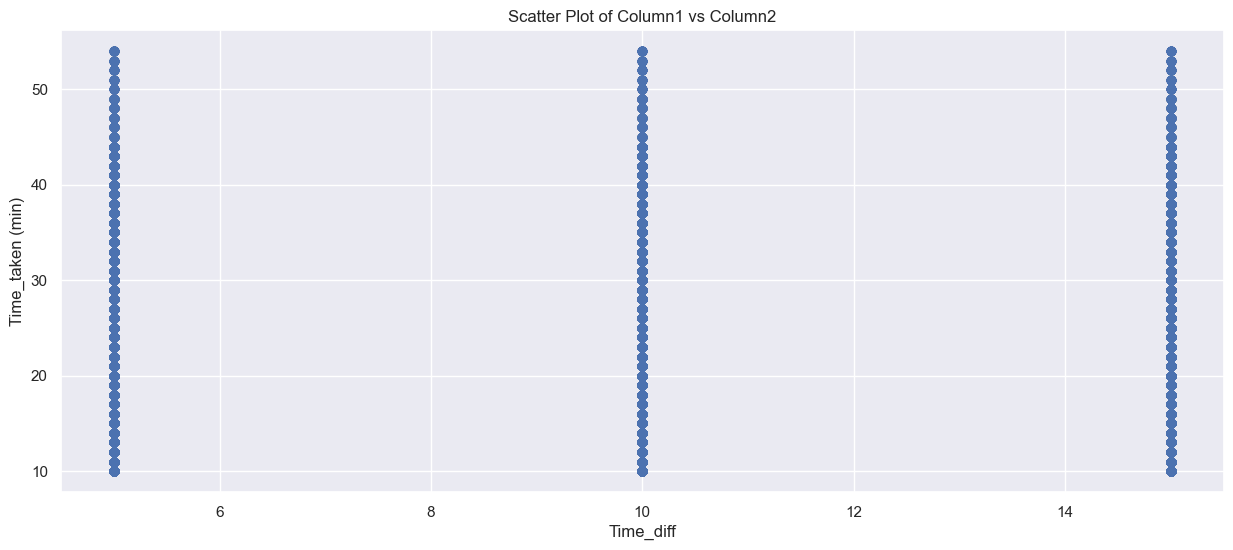

In [12]:
plt.scatter(df_copy['Time_diff'], df_copy['Time_taken (min)'])
plt.title('Scatter Plot of Column1 vs Column2')
plt.xlabel('Time_diff')
plt.ylabel('Time_taken (min)')

In [13]:
numerical_columns = df_copy.columns[df_copy.dtypes!='object']
categorical_columns = df_copy.columns[df_copy.dtypes=='object']

In [14]:
numerical_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_diff'],
      dtype='object')

In [15]:
categorical_columns

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [16]:
for i in categorical_columns:
          print(f'{i} unique value is',df_copy[i].unique())
          print('#'*100)

Weather_conditions unique value is ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
####################################################################################################
Road_traffic_density unique value is ['Jam' 'High' 'Medium' 'Low']
####################################################################################################
Type_of_order unique value is ['Snack' 'Meal' 'Drinks' 'Buffet']
####################################################################################################
Type_of_vehicle unique value is ['motorcycle' 'scooter' 'electric_scooter']
####################################################################################################
Festival unique value is ['No' 'Yes' nan]
####################################################################################################
City unique value is ['Metropolitian' 'Urban' 'Semi-Urban' nan]
###########################################################################################

C:\Users\Asus\AppData\Local\Temp\ipykernel_30360\918141050.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy[numerical_columns[i]])
C:\Users\Asus\AppData\Local\Temp\ipykernel_30360\918141050.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_copy[numerical_columns[i]])
C:\Users

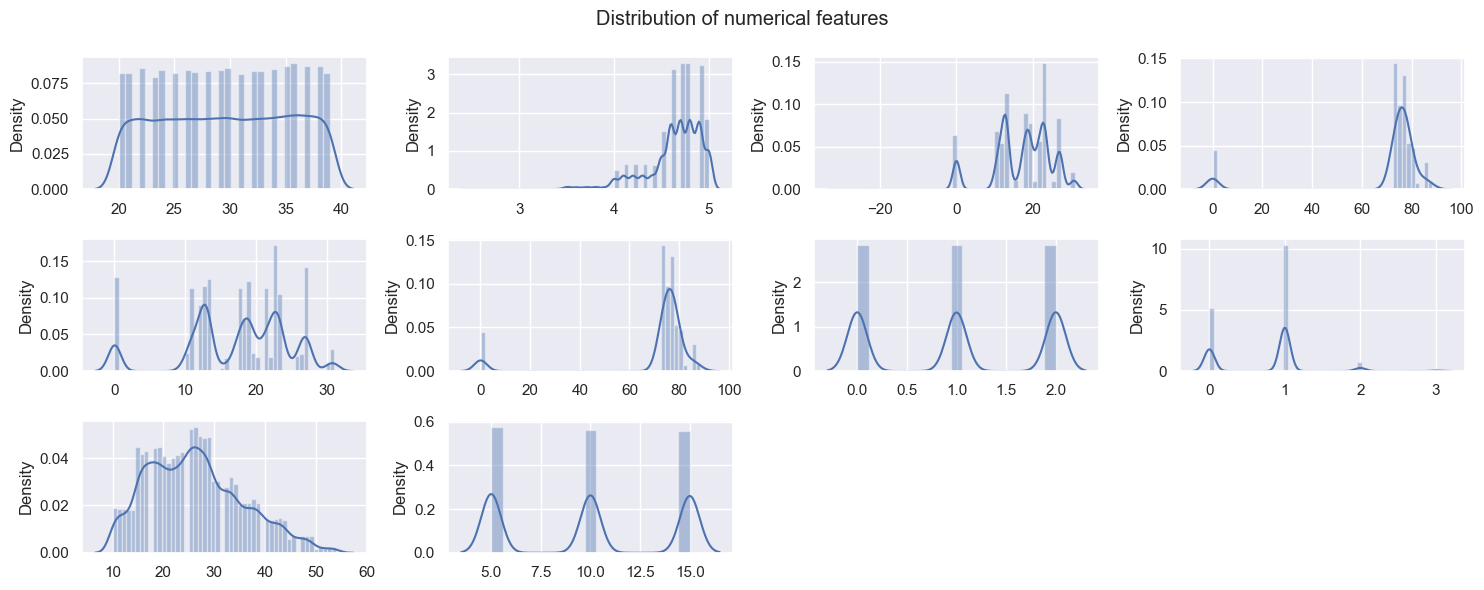

In [340]:
try:
          plt.suptitle("Distribution of numerical features")
          for i in range(0,len(numerical_columns)):
                    plt.subplot(3,4,i+1)
                    sns.distplot(x=df_copy[numerical_columns[i]])
                    plt.tight_layout()
except Exception as e:
          print(e)
          

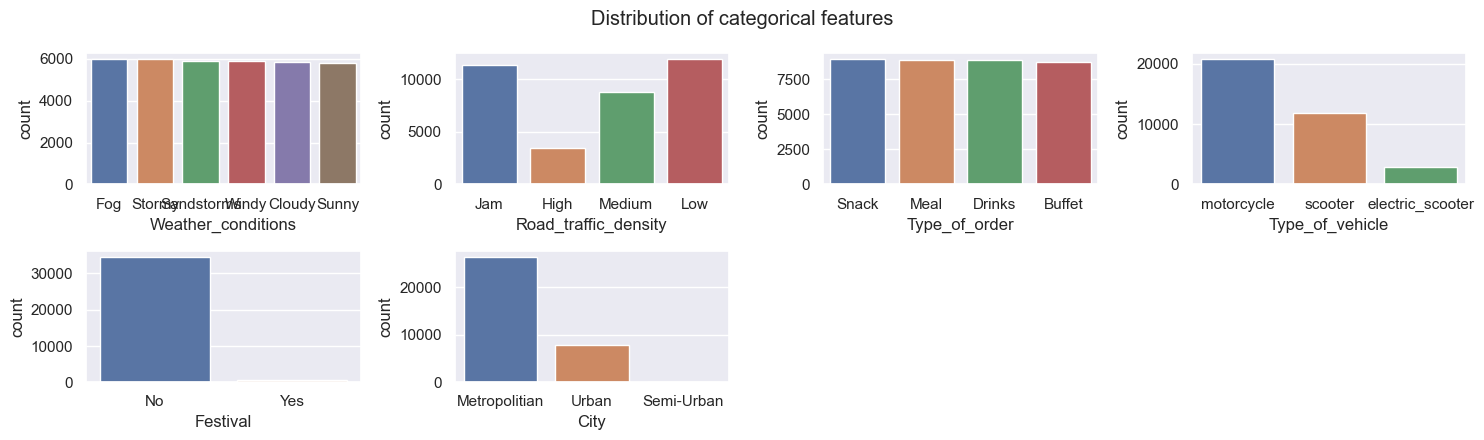

In [177]:
try:
          plt.suptitle("Distribution of categorical features")
          for i in range(0,len(categorical_columns)):
                    plt.subplot(3,4,i+1)
                    sns.countplot(x=df_copy[categorical_columns[i]])
                    plt.tight_layout()
except Exception as e:
          print(e)

In [17]:
df_copy.isnull().sum()

Delivery_person_Age            173
Delivery_person_Ratings        213
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Weather_conditions               0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            763
Festival                       175
City                           920
Time_taken (min)                 0
Time_diff                        0
dtype: int64

In [18]:
import numpy as np

df_copy["Delivery_person_Age"] = df_copy["Delivery_person_Age"].fillna(np.nanmedian(df_copy["Delivery_person_Age"]))
df_copy["Festival"] = df_copy['Festival'].fillna(st.mode(df_copy['Festival']))
df_copy['City'] = df_copy['City'].fillna(st.mode(df_copy['City']))
df_copy['Delivery_person_Ratings'] = df_copy['Delivery_person_Ratings'].fillna(np.nanmedian(df_copy["Delivery_person_Ratings"]))
df_copy['multiple_deliveries'] = df_copy['multiple_deliveries'].fillna(np.nanmedian(df_copy['multiple_deliveries']))



In [19]:
df_copy.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
Time_diff                      0
dtype: int64

In [20]:
df_copy.duplicated().sum()

1

In [21]:
# there is only 1 duplicet value drop it
df_copy.drop_duplicates(inplace=True)

In [22]:
df_copy.shape

(35406, 16)

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35406 entries, 0 to 35817
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          35406 non-null  float64
 1   Delivery_person_Ratings      35406 non-null  float64
 2   Restaurant_latitude          35406 non-null  float64
 3   Restaurant_longitude         35406 non-null  float64
 4   Delivery_location_latitude   35406 non-null  float64
 5   Delivery_location_longitude  35406 non-null  float64
 6   Weather_conditions           35406 non-null  object 
 7   Road_traffic_density         35406 non-null  object 
 8   Vehicle_condition            35406 non-null  int64  
 9   Type_of_order                35406 non-null  object 
 10  Type_of_vehicle              35406 non-null  object 
 11  multiple_deliveries          35406 non-null  float64
 12  Festival                     35406 non-null  object 
 13  City            

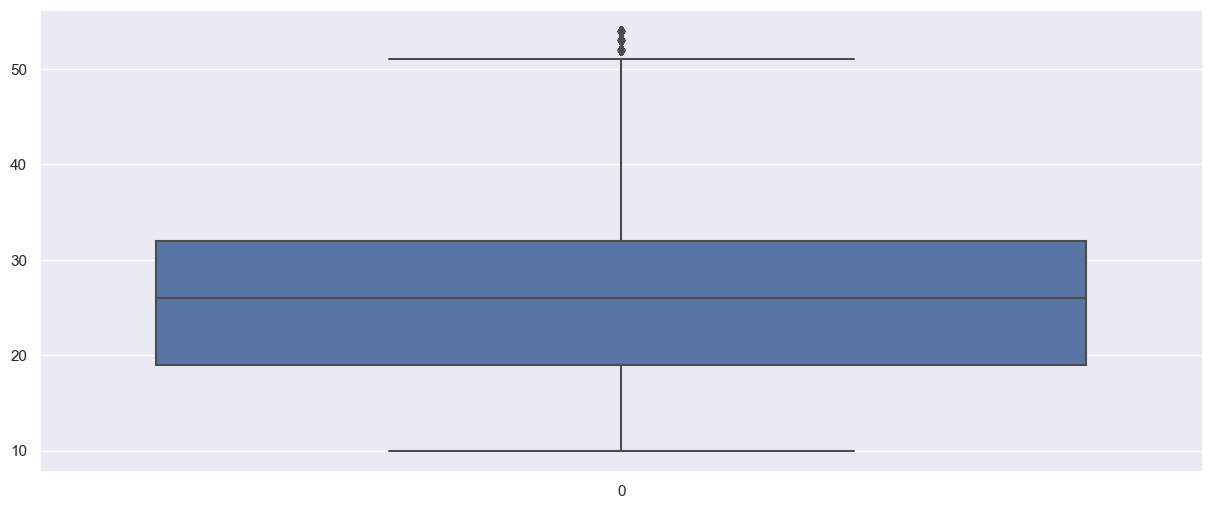

In [24]:
sns.boxplot(df_copy['Time_taken (min)'])
plt.show()

In [25]:
weather = df_copy.groupby("Weather_conditions")["Time_taken (min)"].sum().sort_values(ascending=False).reset_index()

here i am getting Fog weather taking more time to deliver the order


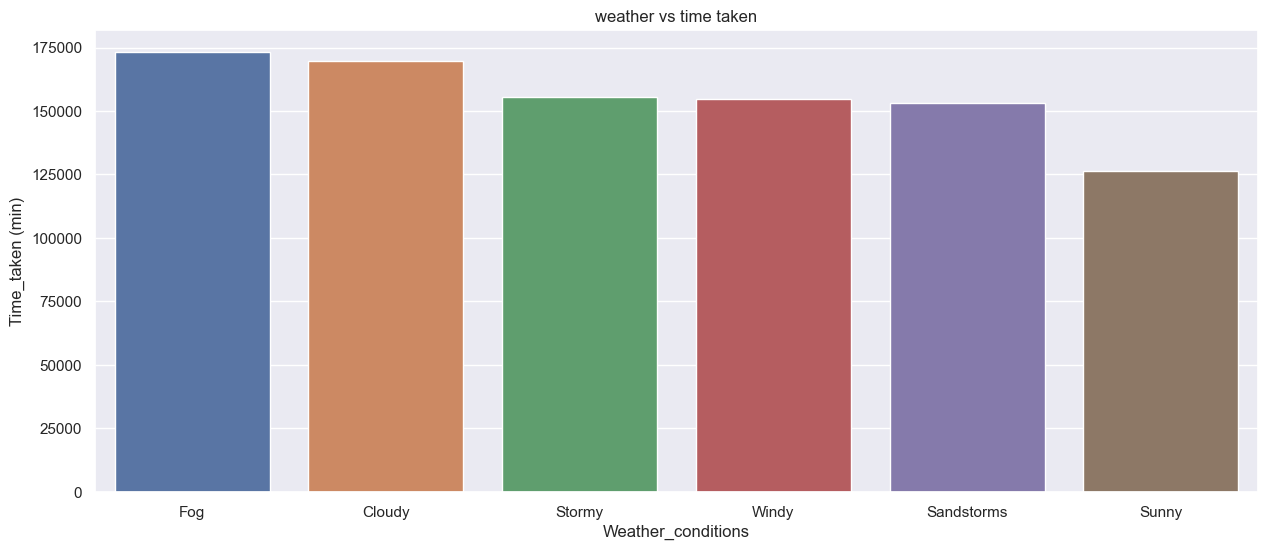

In [420]:
plt.title('weather vs time taken')
sns.barplot(x='Weather_conditions',y='Time_taken (min)',data=weather)
print('here i am getting Fog weather taking more time to deliver the order')


In [421]:
traffic = df_copy.groupby("Road_traffic_density")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

observation is when ever traffic is jam taken time is more and when ever the traffic is low time taken is less


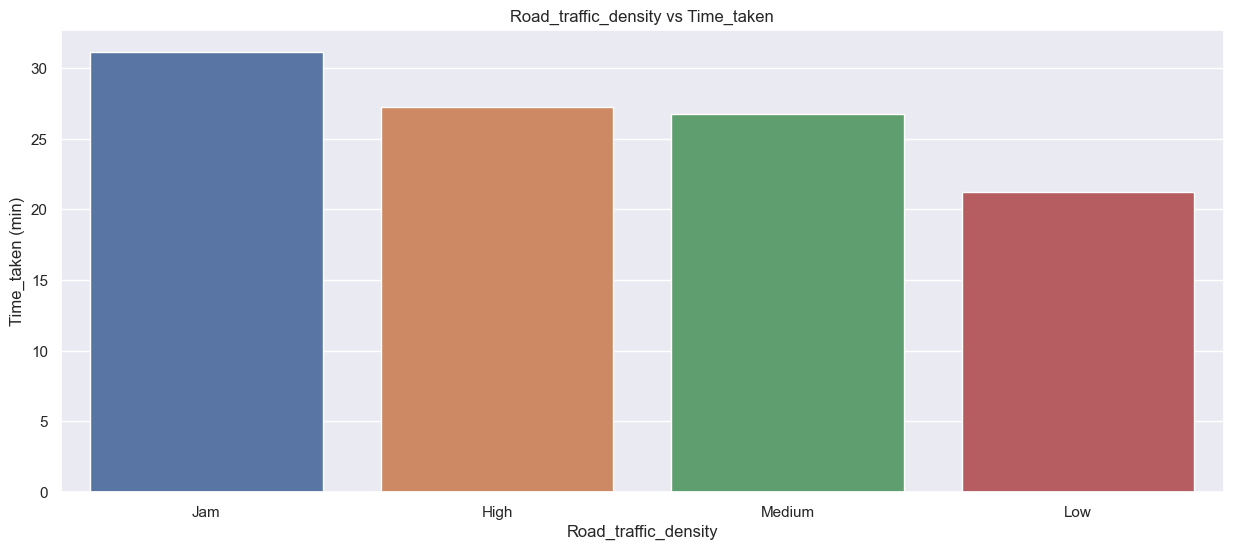

In [422]:
plt.title('Road_traffic_density vs Time_taken')
sns.barplot(x='Road_traffic_density',y='Time_taken (min)',data=traffic)
print("observation is when ever traffic is jam taken time is more and when ever the traffic is low time taken is less")

In [423]:
order = df_copy.groupby("Type_of_order")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

Observation here i am getting the in any type of order there is no such diffrence in time taking


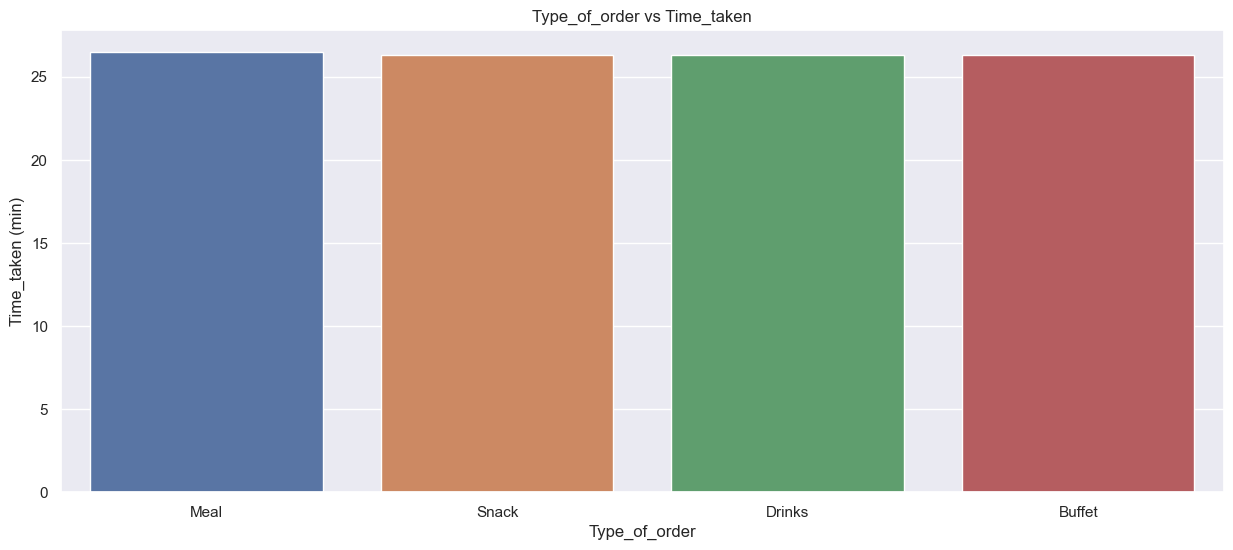

In [424]:
plt.title('Type_of_order vs Time_taken')
sns.barplot(x='Type_of_order',y='Time_taken (min)',data=order)
print('Observation here i am getting the in any type of order there is no such diffrence in time taking')

In [425]:
vehicle = df_copy.groupby("Type_of_vehicle")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'Type_of_vehicle vs Time_taken'}, xlabel='Type_of_vehicle', ylabel='Time_taken (min)'>

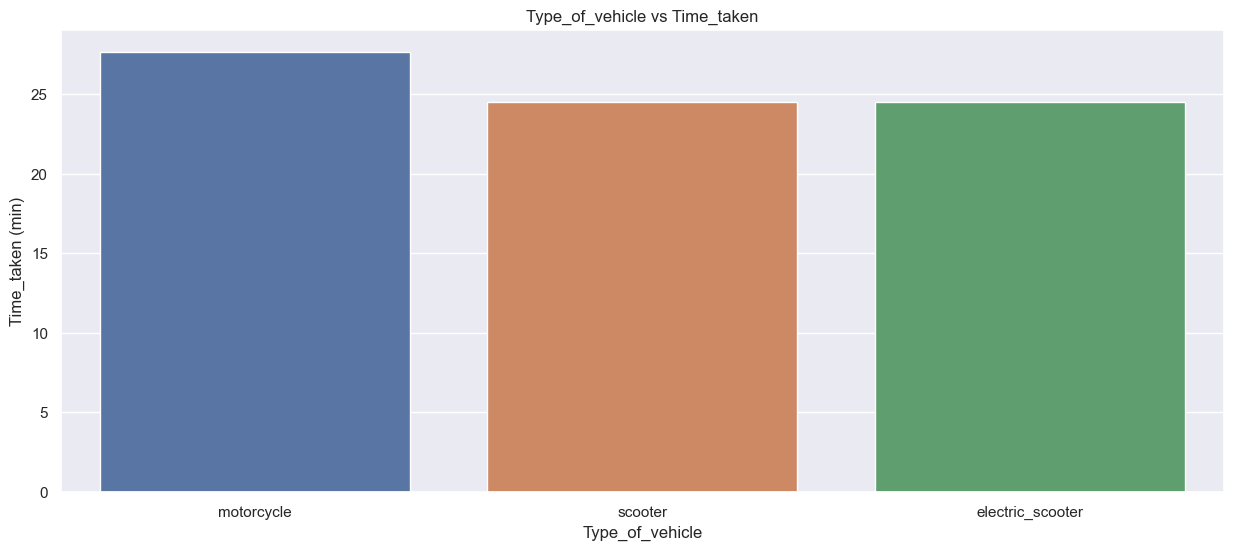

In [426]:
plt.title('Type_of_vehicle vs Time_taken')
sns.barplot(x='Type_of_vehicle',y='Time_taken (min)',data=vehicle)

In [427]:
city = df_copy.groupby("City")["Time_taken (min)"].sum().sort_values(ascending=False).reset_index()

Observation is the Matropolitian city takes more time to deliver the order


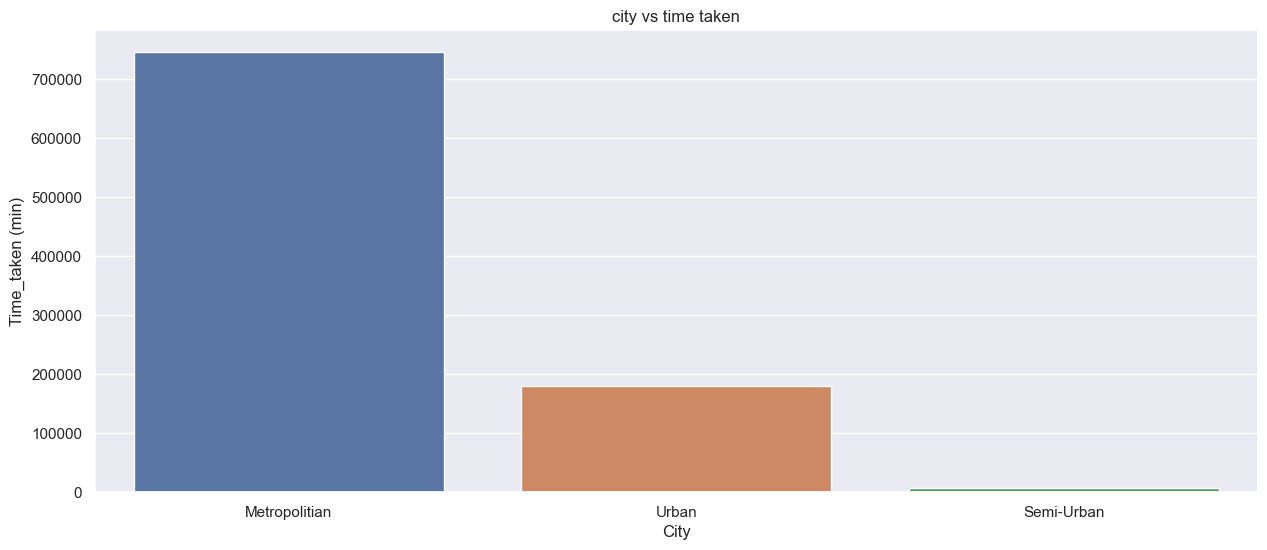

In [428]:
plt.title("city vs time taken")
sns.barplot(x="City",y="Time_taken (min)",data=city)
print('Observation is the Matropolitian city takes more time to deliver the order')

In [429]:
Festival = df_copy.groupby("Festival")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

Observation is the Matropolitian city takes more time to deliver the order


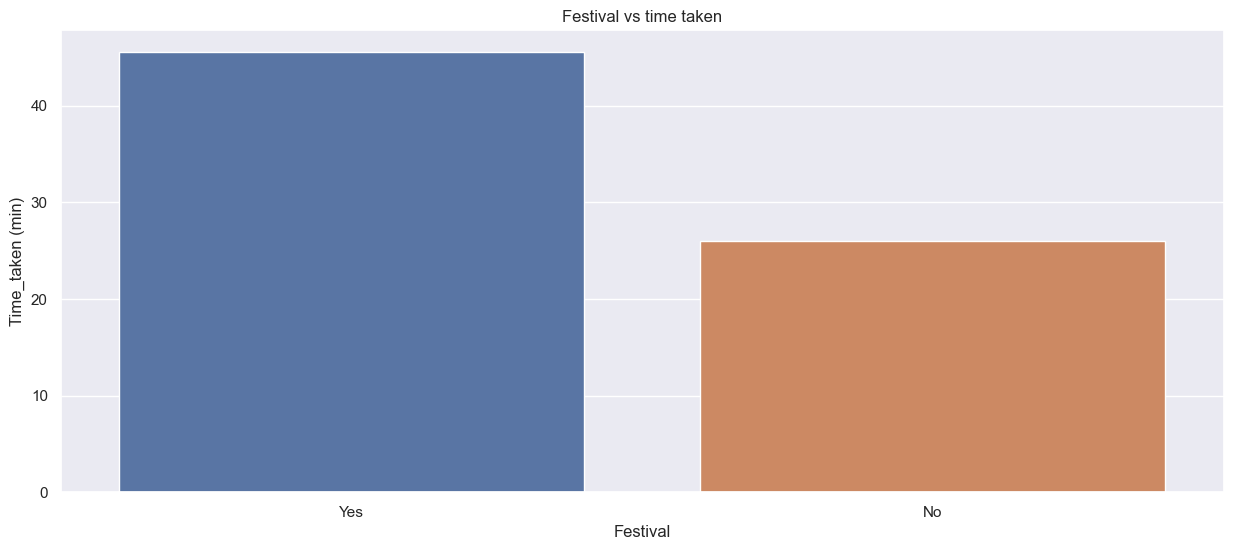

In [430]:
plt.title("Festival vs time taken")
sns.barplot(x="Festival",y="Time_taken (min)",data=Festival)
print('Observation is the Matropolitian city takes more time to deliver the order')

In [431]:
time_diff = df_copy.groupby("Time_diff")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

Observation is the Matropolitian city takes more time to deliver the order


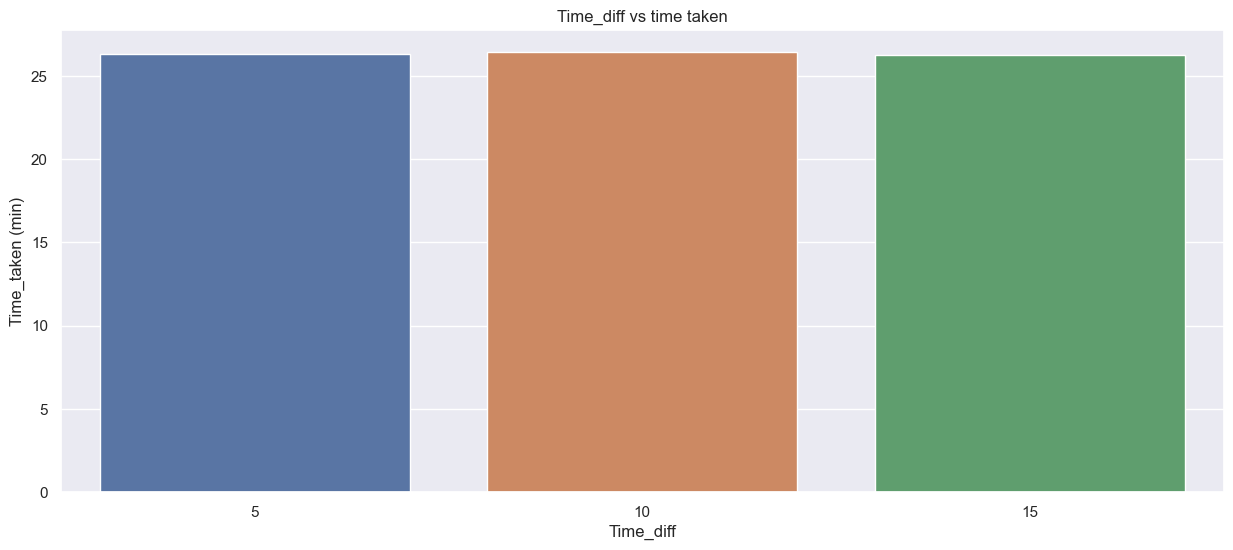

In [432]:
plt.title("Time_diff vs time taken")
sns.barplot(x="Time_diff",y="Time_taken (min)",data=time_diff)
print('Observation is the Matropolitian city takes more time to deliver the order')

In [26]:
# use label encoding on catigorical data to convert in to numerical
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_columns:
     df_copy[i] = lable.fit_transform(df_copy[i])

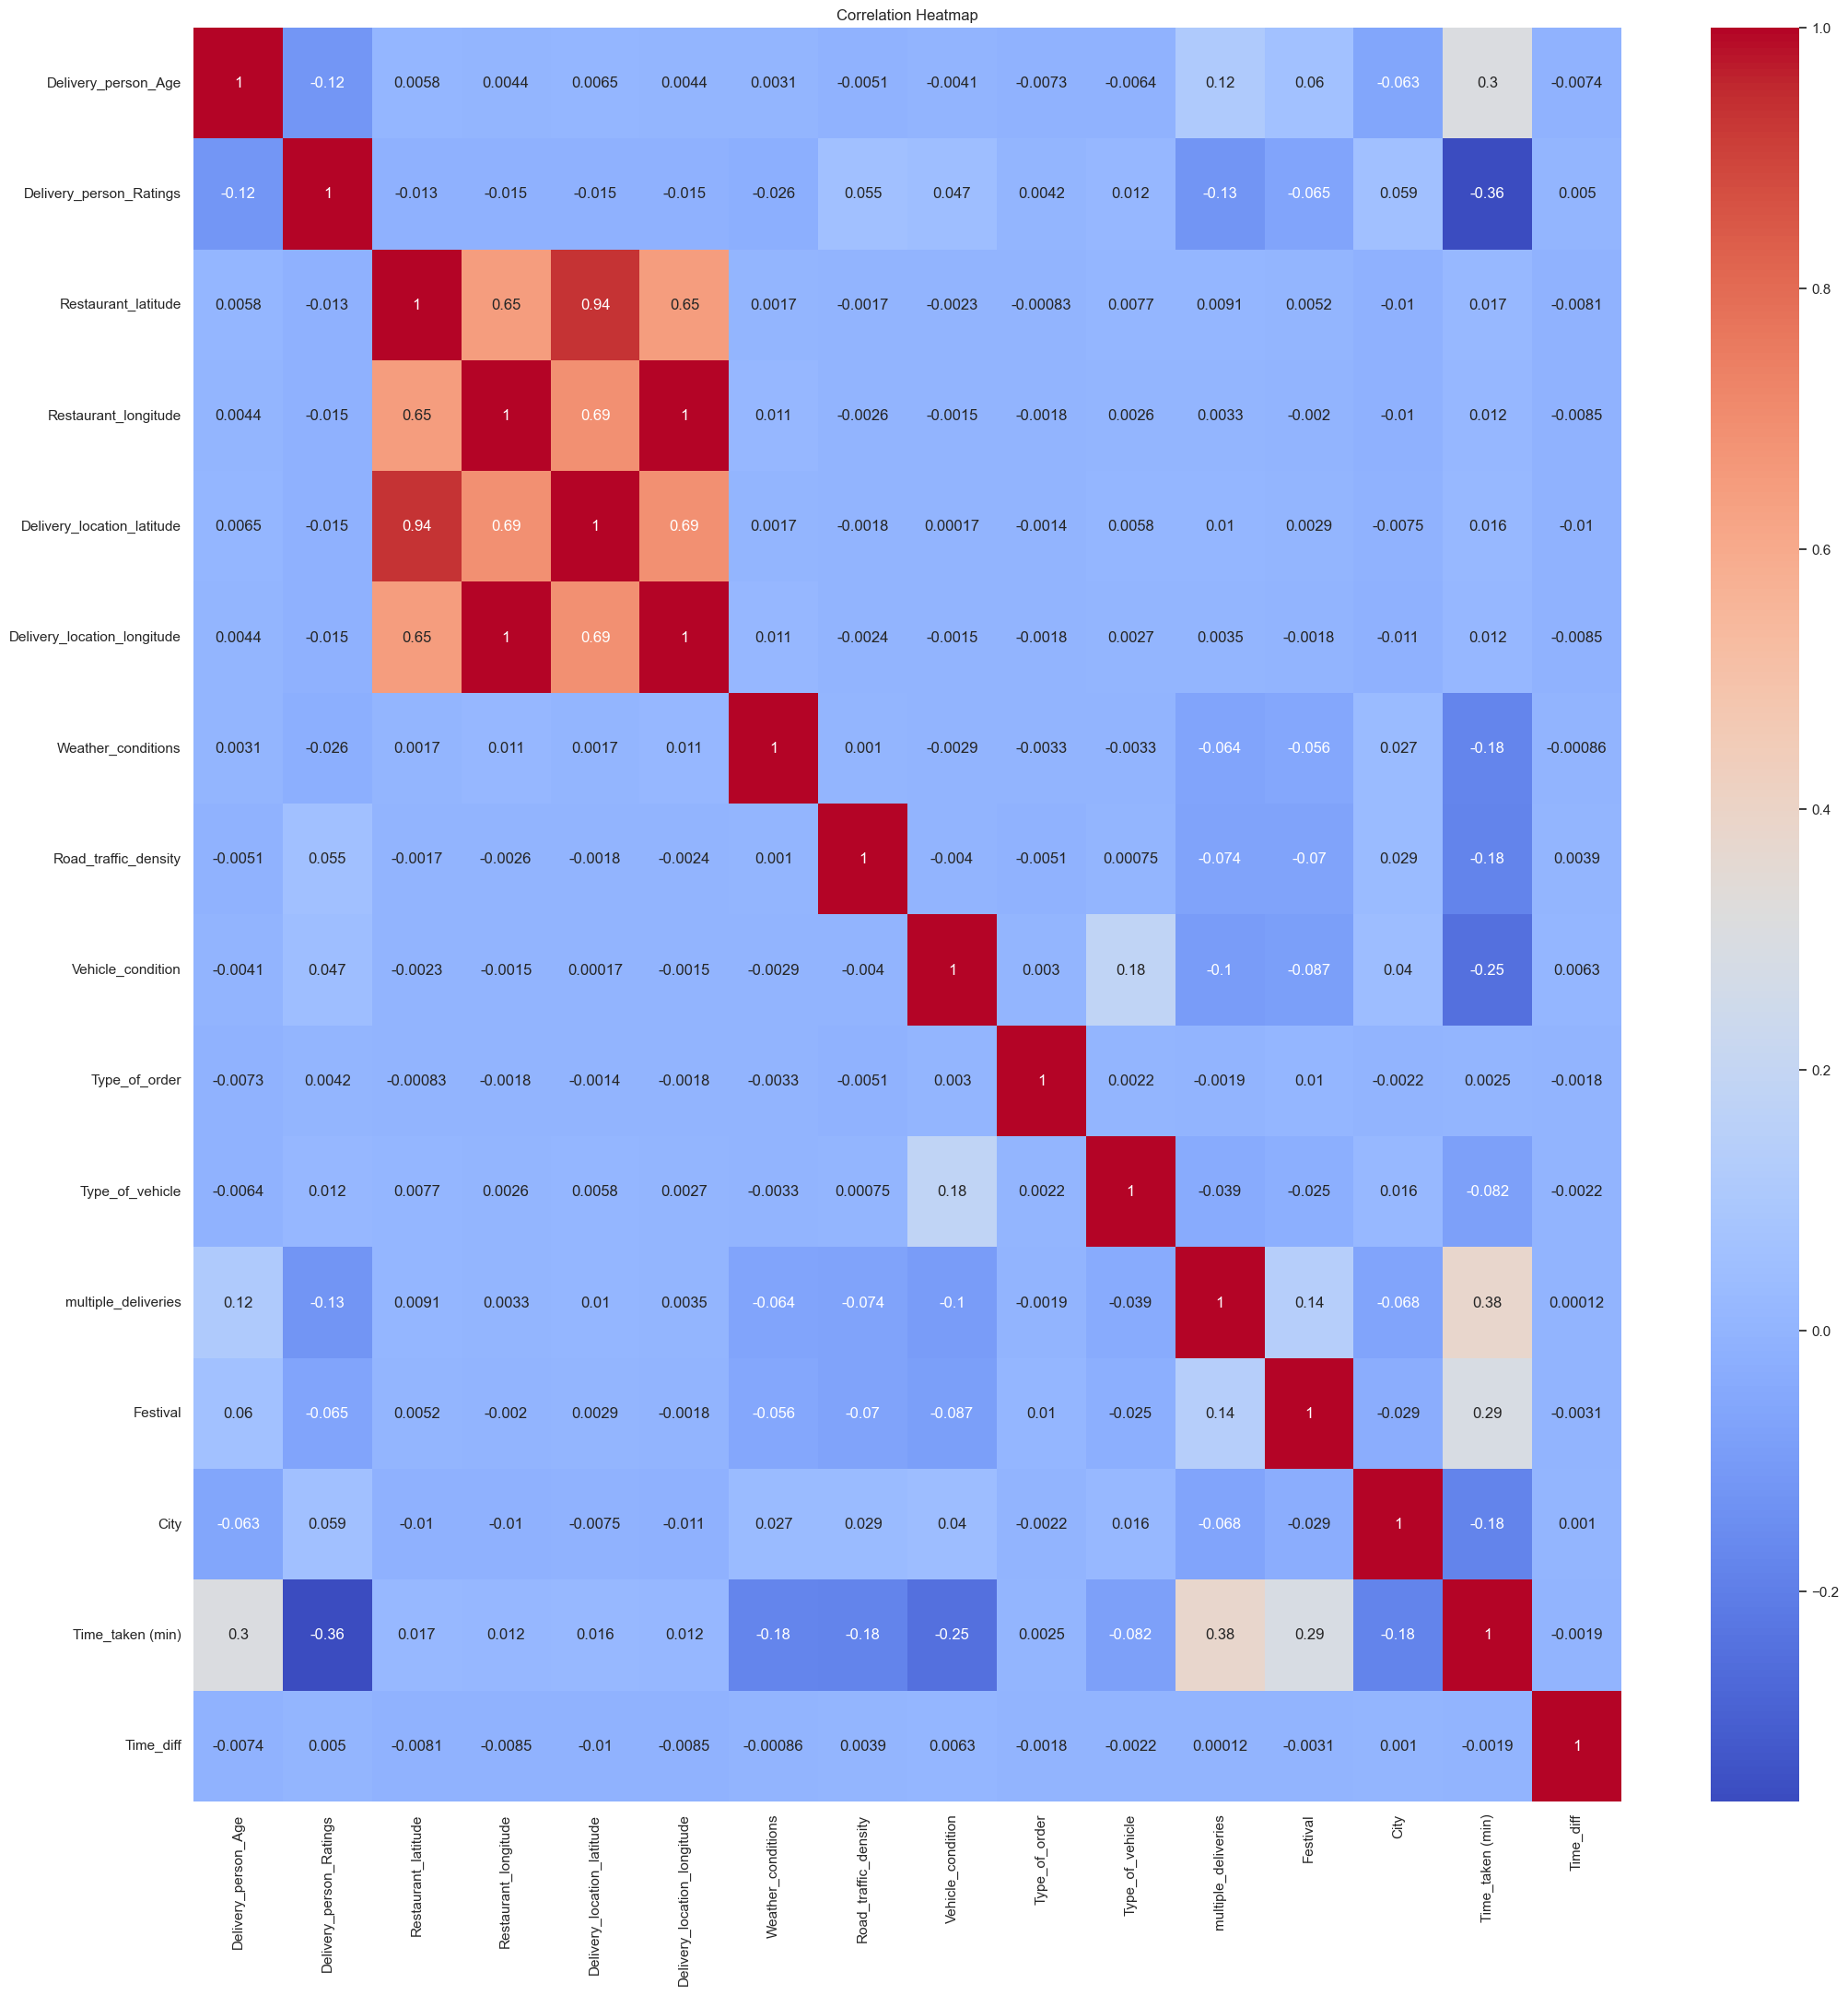

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
import pandas as pd

correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()